In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib import gridspec
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from bumps.names import Parameter
from bumps.fitters import fit

from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment

import bumps
import sasmodels

In [2]:
def read_DAT_file(name):
    with open(name) as pdbfile:
        q = []
        I = []
        dI = []
        start = 10000
        for i,line in enumerate(pdbfile):
            if 'q(A-1)' in line:
                start = i
            if i > start: 
                splitted_line = [line[0:20], line[23:50], line[50:]]
                q.append(splitted_line[0])
                I.append(splitted_line[1])
                dI.append(splitted_line[2])
        q = np.array([float(i) for i in q])
        I = np.array([float(i) for i in I])
        dI = np.array([float(i) for i in dI])
        data = np.hstack((q.reshape(-1,1), I.reshape(-1,1), dI.reshape(-1,1)))
    return data

def convert_data(data, model):
    model_x = model[:,0]
    model_y = model[:,1]
    index = np.linspace(0, len(model_x)-1, len(model_x)) 
    model_q_new = []
    model_I_new = []
    for i in range(len(data)):
        data_q = data[i,0]
        array = np.abs(model_x - data_q)
        array = np.hstack((array.reshape(-1,1), index.reshape(-1,1)))
        array = array[np.argsort(array[:, 0])]
        loc = int(array[0,1])
        model_q_new.append(model_x[loc])
        model_I_new.append(model_y[loc])
    q = np.array(model_q_new).reshape(-1,1)
    I = np.array(model_I_new).reshape(-1,1)
    new_model_data = np.hstack((q, I))
    return new_model_data

def calculate_structure_factor(data0, data2, constant):
    new_data_2 = convert_data(data0, data2)
    fig, ax = plt.subplots(figsize=(7,7))
    plt.scatter(data0[:,0], data0[:,1]*constant, color = 'blue', label = 'data0')
    plt.scatter(new_data_2[:,0], new_data_2[:,1], color = 'red', label = 'data2')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Intensity (arb. unit)')
    plt.xlabel('q ($\\AA^{-1}$)')
    structure_factor = new_data_2[:,1]/((data0[:,1]*constant))
    structure_factor = np.hstack((new_data_2[:,0].reshape(-1,1), structure_factor.reshape(-1,1)))
    return structure_factor


In [5]:
#Load data for bilayer 
path = '../Data/SAXS/Longer Bridge/'
filenames = os.listdir(path)
data_20_bridge = np.load(path + 'Bridge_20.npy')
data_40_bridge = np.load(path + 'Bridge_40.npy')
data_80_bridge = np.load(path + 'Bridge_80.npy')
sphere_polydisperse = np.loadtxt(path + 'sasmodels_sphere_fit.txt', skiprows=1)

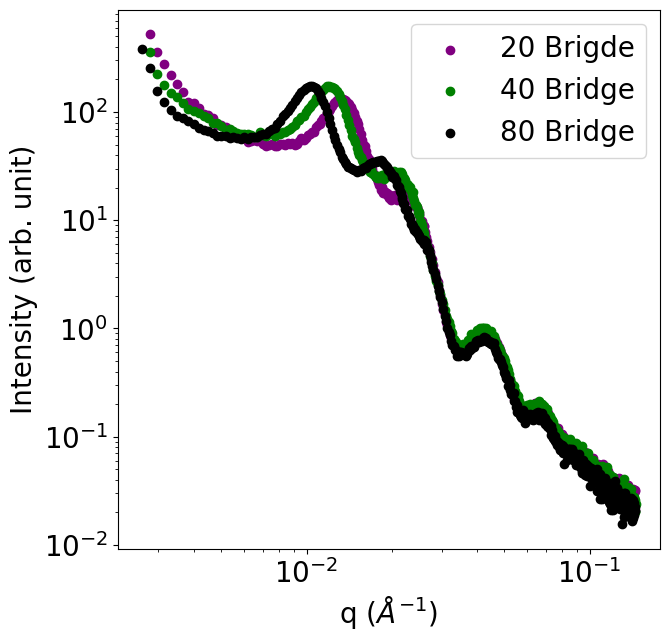

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data_20_bridge[:,0], data_20_bridge[:,1], color = 'purple', label = '20 Brigde')
plt.scatter(data_40_bridge[:,0], data_40_bridge[:,1], color = 'green', label = '40 Bridge')
plt.scatter(data_80_bridge[:,0], data_80_bridge[:,1], color = 'black', label = '80 Bridge')

# plt.scatter([data_20_bridge[np.argmax(data_20_bridge[20:,1])+20][0]], [100], marker = 'x', s = 300, color ='k')
# plt.scatter([data_40_bridge[np.argmax(data_40_bridge[20:,1])+20][0]], [100], marker = 'x', s = 300, color ='k')
#plt.scatter([0.0136], [50], marker = 'x', s = 300, color ='k')
#plt.vlines(0.032, 1e-4, 1e2, color='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Intensity (arb. unit)')
plt.xlabel('q ($\\AA^{-1}$)')
plt.legend()
#plt.savefig('../Figures/Brigde_length.png', dpi=600, bbox_inches="tight")

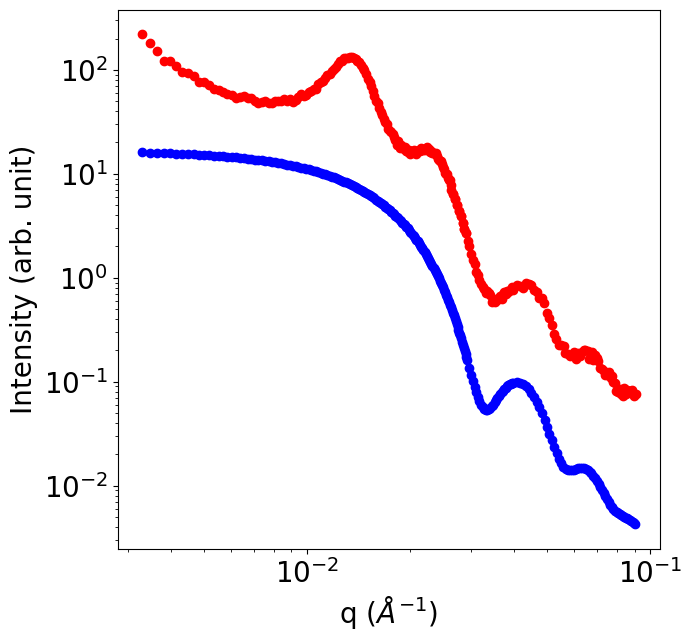

In [12]:
struc_factor = calculate_structure_factor(sphere_polydisperse, data_20_bridge, 1)

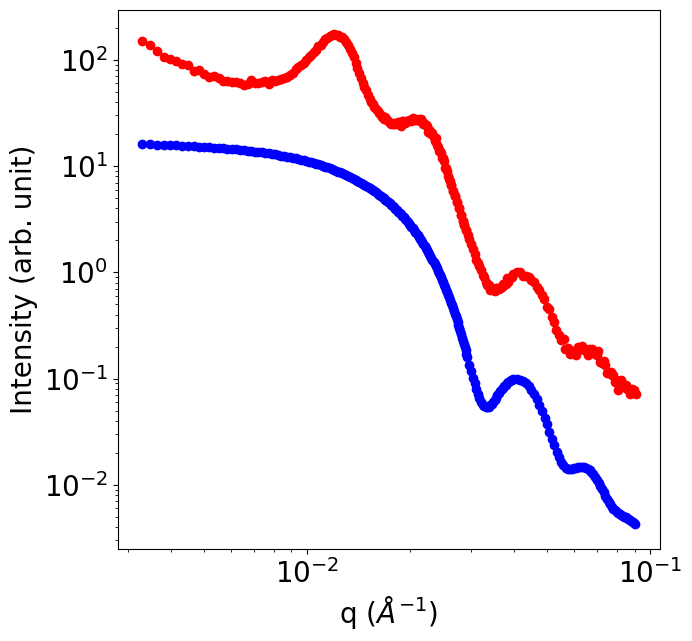

In [13]:
struc_factor_2 = calculate_structure_factor(sphere_polydisperse, data_40_bridge, 1)

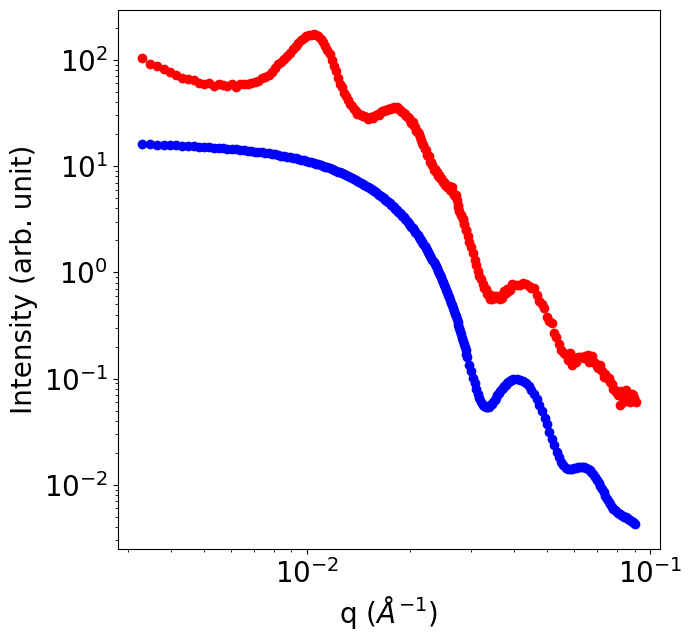

In [14]:
struc_factor_3 = calculate_structure_factor(sphere_polydisperse, data_80_bridge, 1)

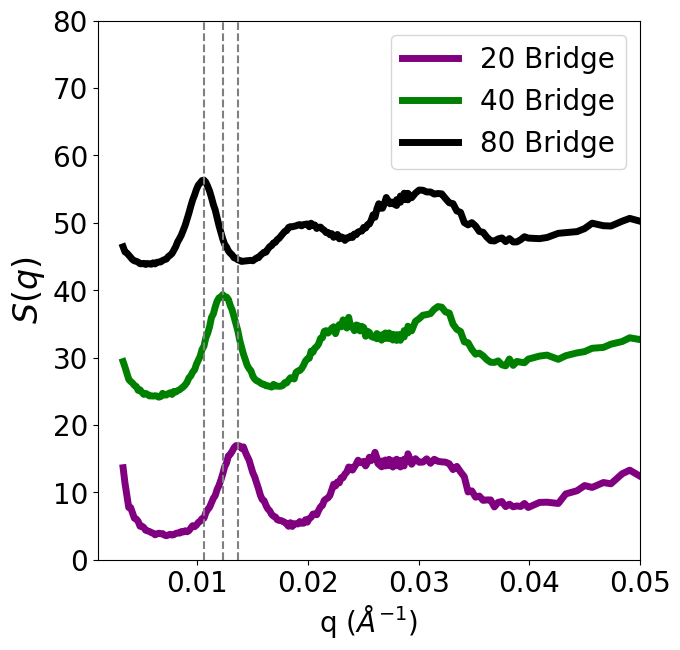

In [ ]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(7,7))
#plt.scatter(data0[:,0], data5)
#plt.scatter(q, data5)
plt.plot(struc_factor[:,0], struc_factor[:,1], linewidth = 5, label = '20 Bridge', color = 'purple')
plt.plot(struc_factor_2[:,0], struc_factor_2[:,1]+20, linewidth = 5, label = '40 Bridge', color = 'green')
plt.plot(struc_factor_3[:,0], struc_factor_3[:,1]+40, linewidth = 5, label = '80 Bridge', color = 'black')

p1 = struc_factor[np.argmax(struc_factor[10:100,1]) + 10, 0]
plt.vlines(p1, 1e-4, 1e2, color='gray', linestyles='--')
p2 = struc_factor_2[np.argmax(struc_factor_2[10:100,1]) + 10, 0]
plt.vlines(p2, 1e-4, 1e2, color='gray', linestyles='--')
p3 = struc_factor_3[np.argmax(struc_factor_3[10:100,1]) + 10, 0]
plt.vlines(p3, 1e-4, 1e2, color='gray', linestyles='--')


plt.xlim([0.001, 0.05])
plt.ylim([0, 80])


#plt.xticks([0.02, 0.03, 0.04])
plt.ylabel('$S(q)$', fontsize=24)
plt.xlabel('q ($\\AA^{-1}$)')
plt.legend()
#plt.savefig('../Figures/Structure_Factor_with_lines.png', dpi=600, bbox_inches="tight")